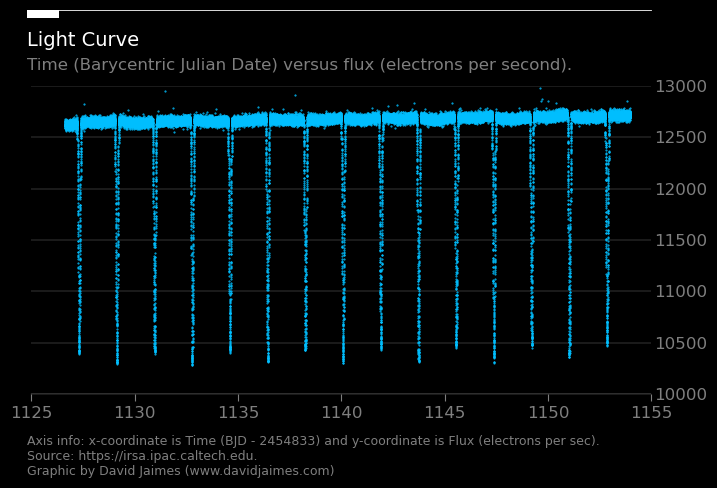

In [3]:
import glob
from astropy.io import fits
import matplotlib.pyplot as plt
from mpl_style import pro, pro_plot
import numpy as np
plt.style.use(pro)
blue = "deepskyblue"

fname = glob.glob("data/*slc.fits")
hdu = fits.open(fname[-1])
time = hdu[1].data['TIME']
flux = hdu[1].data['SAP_FLUX']

fig, ax = plt.subplots()
title = "Light Curve"
subtitle = "Time (Barycentric Julian Date) versus flux (electrons per second)."
caption = "Axis info: x-coordinate is Time (BJD - 2454833) and y-coordinate is Flux (electrons per sec).\nSource: https://irsa.ipac.caltech.edu.\n"
pro_plot(title, subtitle, caption, fig=fig, ax=ax, plt=plt)
ax.plot(time, flux, '.', markersize=1, c=blue)
ax.set_xlim(1125, 1155)
ax.set_ylim(10000, 13000)
plt.savefig('koi-3570-lc.png')

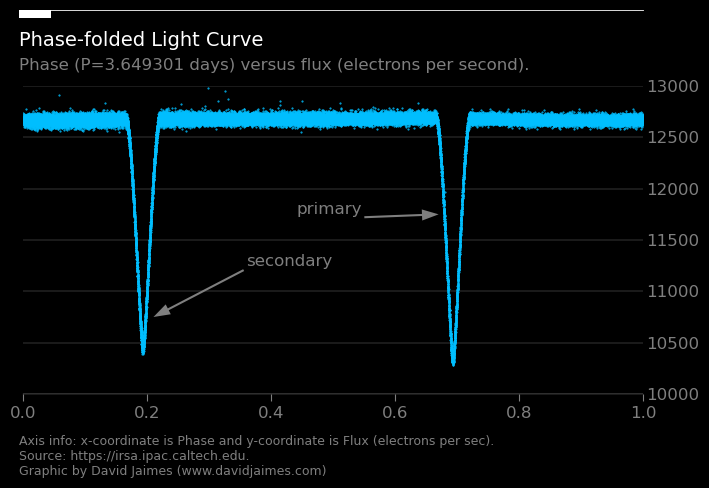

In [42]:
fig, ax = plt.subplots()
title = "Phase-folded Light Curve"
subtitle = "Phase (P=3.649301 days) versus flux (electrons per second)."
caption = "Axis info: x-coordinate is Phase and y-coordinate is Flux (electrons per sec).\nSource: https://irsa.ipac.caltech.edu.\n"
pro_plot(title, subtitle, caption, fig=fig, ax=ax, plt=plt)

period = 3.649301
phase = (time - time[0]) / period % 1
ax.plot(phase, flux, '.', markersize=1, c=blue)
ax.annotate('primary', xy=(0.67, 11750), xytext=(0.44, 11750), c="C7", size=12,
            arrowprops=dict(facecolor='C7', width=1.5, headwidth=8))
ax.annotate('secondary', xy=(0.21, 10750), xytext=(0.36, 11250), c="C7", size=12,
            arrowprops=dict(facecolor='C7', width=1.5, headwidth=8))
ax.set_xlim(0, 1)
ax.set_ylim(10000, 13000)
plt.savefig('koi-3570-pflc.png')